# <font color="black">**#Exploratory Data Analysis**<font>
<font color="darkblue">#####################################################################################################<font>

The datasets i have considered for this assignment are


1.   UCI Heart Disease Data
2.   Air Quality Index-New Delhi

#UCI Heart Disease Data
<font color="red"> **The Machine learning task  corresponding to UCI Heart Disease Data  is classification**<font>

The UCI Heart Disease dataset contains various attributes related to heart health, aiming to predict the presence of heart disease in patients. It includes information like age, sex, chest pain type, cholesterol levels, and more, collected from individuals undergoing diagnostic tests. Each instance in the dataset represents a patient, and the dataset offers insights into factors that may contribute to heart disease diagnosis. Researchers and analysts use this dataset to build predictive models to identify patterns or risk factors associated with heart disease, contributing to better understanding and diagnosis of cardiac conditions.




#Air Quality Index-New Delhi

 <font color="red">**The Machine learning task  associated with this dataset is Regression**.<font>

The pollution in delhi has been a concering issue in our country for a while now . This datset can give insights into creating a model that can predict the Air Quality index based on the feature values in differnt regions of the country .

In [ ]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import csv files
#https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/download?datasetVersionNumber=6
#https://www.kaggle.com/datasets/ritesh7355/air-quality-indexnew-delhi/download?datasetVersionNumber=1

df_Heart_data = pd.read_csv('heart_disease_uci.csv')
df_AQI_delhi = pd.read_csv('Air Quality Index- Delhi.csv')


In [ ]:
#Sample of the AQI dataset
df_AQI_delhi.head()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [ ]:
#Sample of the AQI dataset
df_Heart_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<font color="darkblue">#####################################################################################################<font>

<font color="darkblue">For this analysis i am considering the iris petal datset which is one of the most commonly used datsets for understanding classification<font>

# **#Description of the data**

In [ ]:
df_Heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


This dataset consists of 920 entries with various attributes related to heart health.
**id: (Numerical)** An identifier for each entry, stored as integers ranging across the dataset.

**age: (Numerical)** Represents the age of individuals in years.

**sex: (Nominal)** Denotes the gender of the individuals ('male' or 'female').

**dataset: (Nominal)** Indicates the dataset source or origin.

**cp: (Nominal)** Categorical variable specifying the type of chest pain.

**trestbps: (Numerical)** Measurement of resting blood pressure in mm Hg.

**chol: (Numerical)** Serum cholesterol level in mg/dl.

**fbs: (Nominal)** Fasting blood sugar > 120 mg/dl ('true' or 'false').

**restecg: (Nominal)** Resting electrocardiographic results categorized.

**thalch: (Numerical)** Maximum heart rate achieved.

**exang: (Nominal)** Exercise-induced angina ('yes' or 'no').

**oldpeak: (Numerical)** ST depression induced by exercise relative to rest.

**slope: (Numerical)** The slope of the peak exercise ST segment.

**ca: (Numerical)** Number of major vessels colored by fluoroscopy.

**thal: (Nominal)** Thalassemia type.

**num: (Nominal)** Numeric variable indicating potential heart condition (target variable).


This dataset includes a mix of numerical and categorical attributes representing various health measurements and diagnostic indicators related to heart health.


<font color="darkblue">#####################################################################################################<font>

# **#Data Cleaning:**

In [ ]:
#there are some missing data in the dataset #identify and correct them
df_Heart_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
# Impute missing values for numerical columns
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in num_cols:
    df_Heart_data[col].fillna(df_Heart_data[col].median(), inplace=True)

# Impute missing values for categorical columns
cat_cols = ['fbs', 'restecg', 'exang']
for col in cat_cols:
    df_Heart_data[col].fillna(df_Heart_data[col].mode()[0], inplace=True)

# Drop columns with a high number of missing values
df_Heart_data.drop(['slope', 'ca', 'thal'], axis=1, inplace=True)


In [ ]:
#there are some missing data in the dataset #identify and correct them
df_Heart_data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

<font color="darkblue">#####################################################################################################<font>

# **#Outlier Detection:**

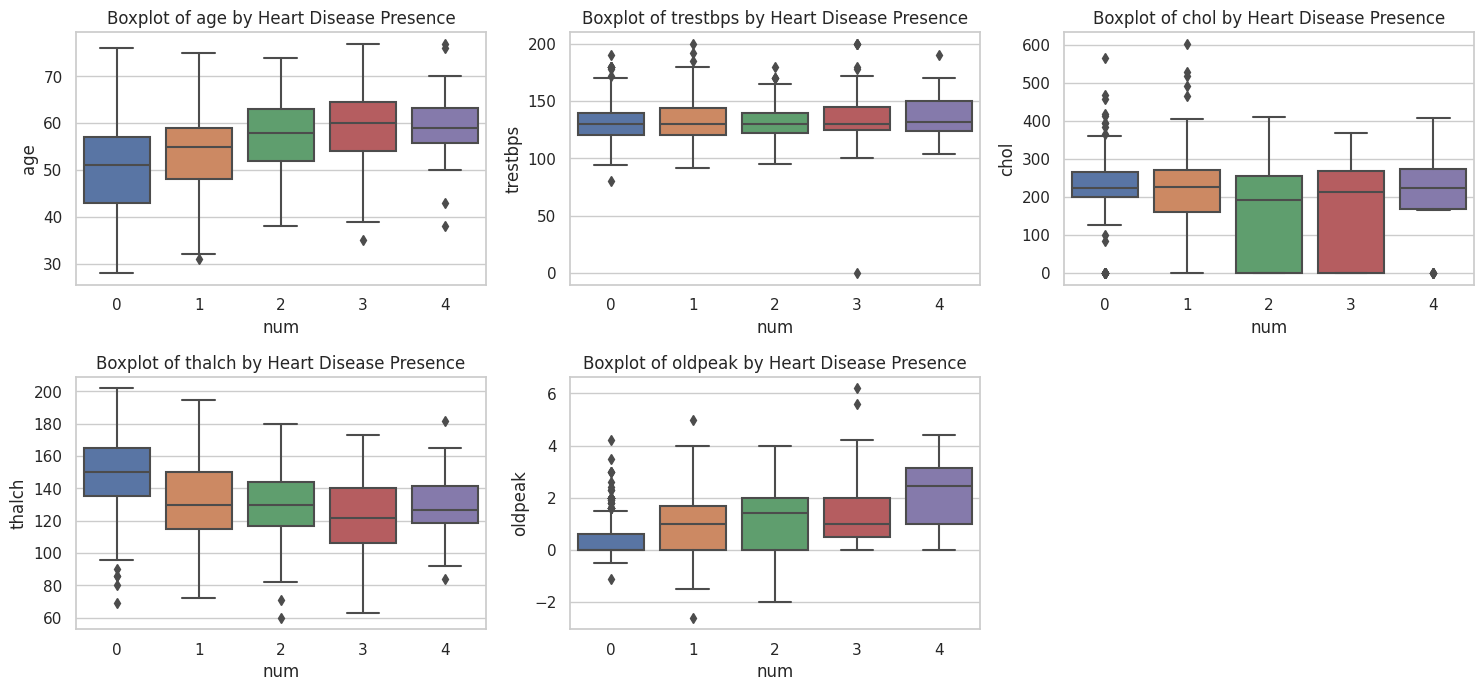

In [ ]:

plt.figure(figsize=(15, 10))

# Creating box plots for all numerical columns except 'id' and 'num'
numerical_columns = df_Heart_data.select_dtypes(include='number').columns.tolist()
numerical_columns.remove('id')
numerical_columns.remove('num')

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='num', y=column, data=df_Heart_data)
    plt.title(f'Boxplot of {column} by Heart Disease Presence')

plt.tight_layout()
plt.show()

The box plots show outliers are present in the dataset its also show that the data has enough variation to build a  predictive model

In [ ]:
# using IQR to remove outliers from the dataset

# Function to remove outliers based on IQR for a specific column
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# List of numerical columns (excluding 'id' and 'num')
numerical_columns = df_Heart_data.select_dtypes(include='number').columns.tolist()
numerical_columns.remove('id')
numerical_columns.remove('num')

# Removing outliers for each numerical column
for column in numerical_columns:
    df_Heart_data = remove_outliers_iqr(df_Heart_data, column)

# Displaying the updated shape of the DataFrame after removing outliers
print("Shape after removing outliers:", df_Heart_data.shape)


Shape after removing outliers: (702, 13)


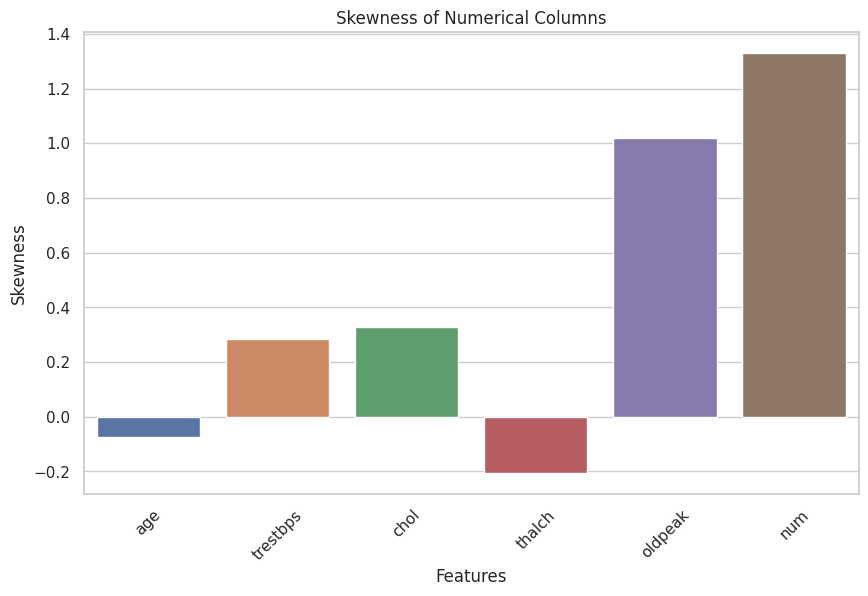

Skewness for Numerical Columns:
age        -0.074038
trestbps    0.285466
chol        0.326269
thalch     -0.206263
oldpeak     1.020170
num         1.329656
dtype: float64


In [ ]:
# Selecting numerical columns
numerical_columns = df_Heart_data.select_dtypes(include='number').columns.tolist()
numerical_columns.remove('id')  # Removing 'id' column

# Calculate skewness for each numerical column
skewness = df_Heart_data[numerical_columns].skew()

# Plotting skewness values
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=45)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.show()

# Display skewness values
print("Skewness for Numerical Columns:")
print(skewness)

# **#Univariate Analysis:**

Analysis of features individually

#AGE
 Age will always be a major factor in heart oriented diseases, usually observed that the individual age increases increases risk of diseases

In [ ]:
age_stats = df_Heart_data['age'].describe()
print("Descriptive Statistics for Age:")
print(age_stats)

Descriptive Statistics for Age:
count    702.000000
mean      52.705128
std        9.523150
min       28.000000
25%       46.000000
50%       54.000000
75%       59.000000
max       77.000000
Name: age, dtype: float64


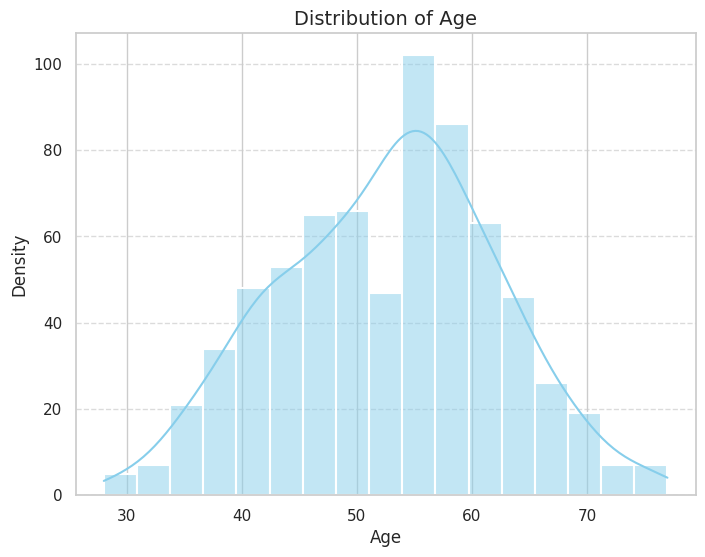

In [ ]:
sns.set(style='whitegrid')

# Distribution plot (KDE) for 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df_Heart_data['age'], kde=True, color='skyblue', linewidth=1.5)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Age', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Its oserved that the age range of 50-60 is the most prominent in the dataset
<font color="darkblue">#####################################################################################################<font>

#Gender of the individual(SEX)
 The gender of the individual can also give different results as the constituents of different genders of the same species varies gender specific reasons may lead to different diseases

Frequency Counts for Sex:
Male      533
Female    169
Name: sex, dtype: int64


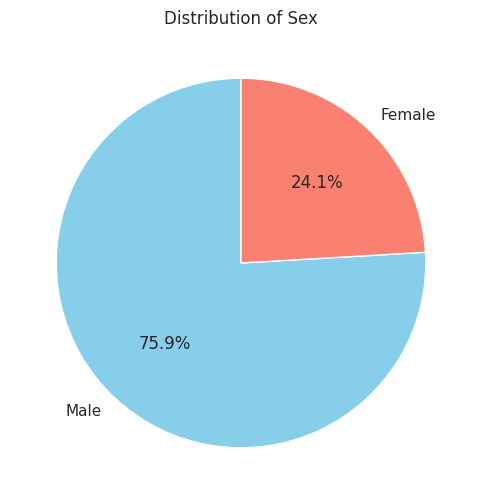

In [ ]:
# Calculate frequency counts for 'Sex'
sex_counts = df_Heart_data['sex'].value_counts()
print("Frequency Counts for Sex:")
print(sex_counts)

# Visualization - Pie chart for 'Sex'
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Distribution of Sex')
plt.show()

its observed that a majority of the patients are male
<font color="darkblue">#####################################################################################################<font>

#Type of disease(cp)
 There might e a category of disease that frequently appears and type that rarely appears

Frequency Counts for Chest Pain Type:
asymptomatic       338
non-anginal        164
atypical angina    161
typical angina      39
Name: cp, dtype: int64


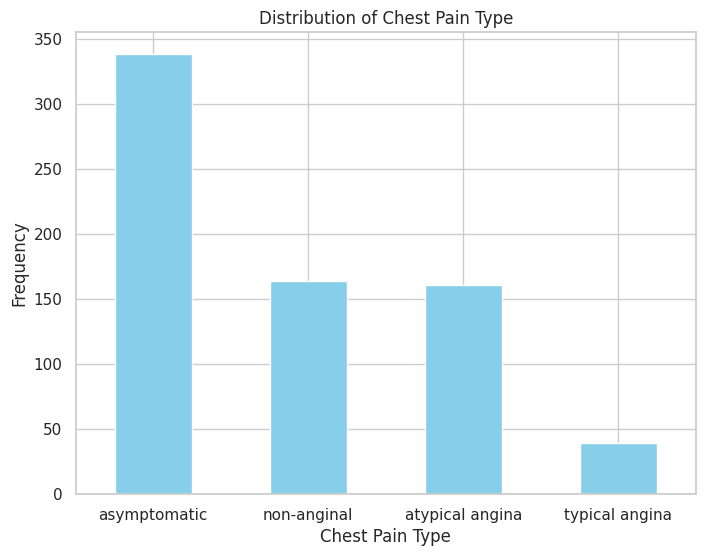

In [ ]:
cp_counts = df_Heart_data['cp'].value_counts()
print("Frequency Counts for Chest Pain Type:")
print(cp_counts)

# Visualization - Bar plot for 'Chest Pain Type'
plt.figure(figsize=(8, 6))
cp_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Distribution of Chest Pain Type')
plt.xticks(rotation=0)
plt.show()

from the ar graph we can see that the **asymptomatic** is the most frequenlty oserved one and **typical angina** is the least observed one.
<font color="darkblue">#####################################################################################################<font>

These three factors seem the most influencal variables in the datset .<font color="darkblue">#####################################################################################################<font>

# **#Bivariate analysis:**

Analysis of features as sets of 2 combinations

1.   **Numerical vs. Categorical: Relationship between  Age and Sex**
     

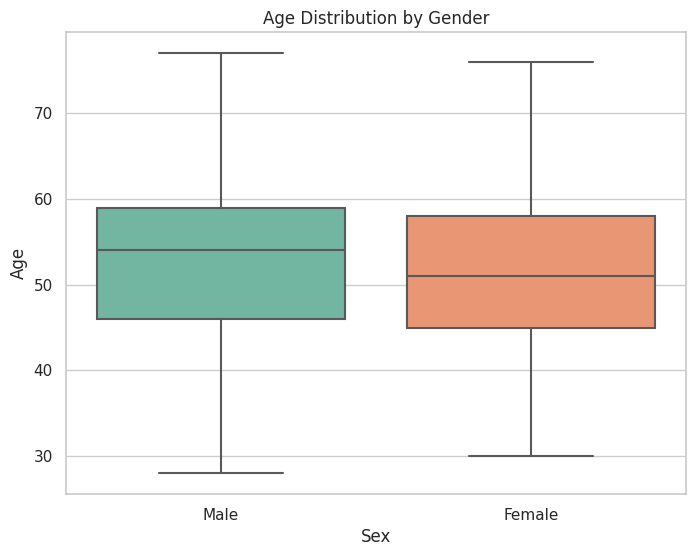

In [ ]:
#  Age and Sex (Box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='age', data=df_Heart_data, palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.show()

Regardless of the fact the majority of patients are males the box plots shows the age distriution of the patients are similar  for both genders

2. **Two Categorical Predictors: Relationship between Sex and Chest Pain Type**

there is apossility that the pain types varies ased on the chemical composition of each gender

Cross-tabulation (Sex vs Chest Pain Type):
cp      asymptomatic  atypical angina  non-anginal  typical angina
sex                                                               
Female            53               57           50               9
Male             285              104          114              30


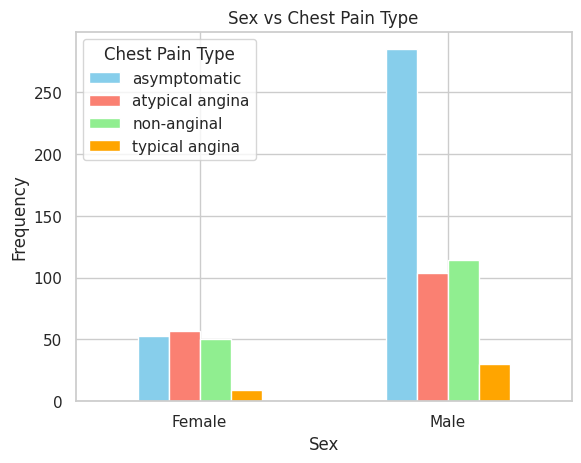

In [ ]:
cross_tab = pd.crosstab(df_Heart_data['sex'], df_Heart_data['cp'])
print("Cross-tabulation (Sex vs Chest Pain Type):")
print(cross_tab)

# Visualization - Grouped Bar plot for 'Sex' vs 'Chest Pain Type'
cross_tab.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex vs Chest Pain Type')
plt.xticks(rotation=0)
plt.legend(title='Chest Pain Type', loc='upper left')
plt.show()

irrespective of the fact the female data is less it can be seen that **for the male gender asymptomatic chest pain is the most observed** wheares in feamles it is equally distributed

3. **Two Numerical Predictors: Correlation between 'Cholesterol ' and 'Maximum Heart Rate''**

In [ ]:
#0 cholesterol is an error entry removing these entries
# Filtering rows where 'Cholesterol' is not equal to zero
df_Heart_data = df_Heart_data[df_Heart_data['chol'] != 0]



ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. high blood pressure is considered to be 140/90mmHg or higher.

A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal. A total cholesterol level of 200 to 239 mg/dL (5.17 to 6.18 mmol/L) is borderline high. A total cholesterol level of 240 mg/dL (6.21 mmol/L) or greater is high

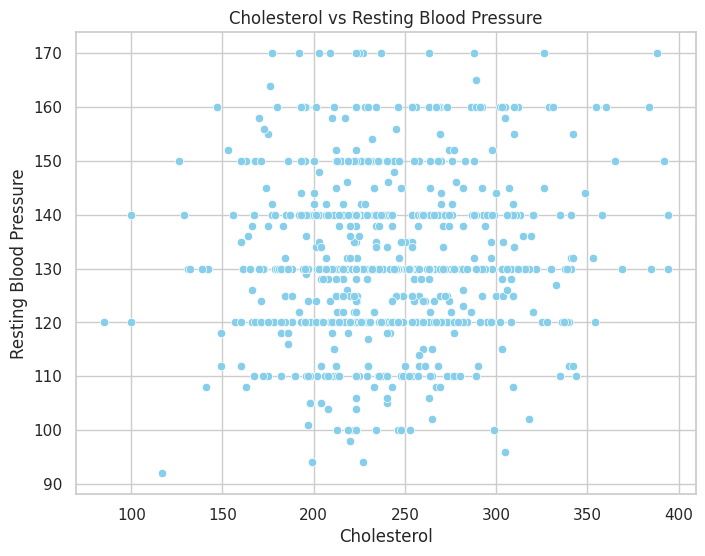

In [ ]:
# Bivariate Analysis - Scatter plot for 'Cholesterol' vs 'Resting Blood Pressure'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='chol', y='trestbps', data=df_Heart_data, color='skyblue')
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')
plt.title('Cholesterol vs Resting Blood Pressure')
plt.grid(True)
plt.show()

based on the Scatter plot for 'Cholesterol' vs 'Resting Blood Pressure' its is oserved that high Cholesterol values corresponds to high Resting Blood Pressure values

<font color="darkblue">#####################################################################################################<font>

# **#Correlation Analysis**


<ipython-input-66-23df4b516287>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_Heart_data.corr()


                id       age  trestbps      chol       fbs    thalch  \
id        1.000000  0.207524  0.098821 -0.037558  0.211843 -0.397899   
age       0.207524  1.000000  0.240264  0.101329  0.244055 -0.365760   
trestbps  0.098821  0.240264  1.000000  0.076889  0.153023 -0.114289   
chol     -0.037558  0.101329  0.076889  1.000000  0.040511 -0.020620   
fbs       0.211843  0.244055  0.153023  0.040511  1.000000 -0.084135   
thalch   -0.397899 -0.365760 -0.114289 -0.020620 -0.084135  1.000000   
exang     0.166843  0.180582  0.138767  0.097157  0.012424 -0.396501   
oldpeak   0.022398  0.247870  0.182016  0.054520  0.027073 -0.263181   
num       0.208308  0.375197  0.156356  0.072265  0.176519 -0.324293   

             exang   oldpeak       num  
id        0.166843  0.022398  0.208308  
age       0.180582  0.247870  0.375197  
trestbps  0.138767  0.182016  0.156356  
chol      0.097157  0.054520  0.072265  
fbs       0.012424  0.027073  0.176519  
thalch   -0.396501 -0.263181 -0.3

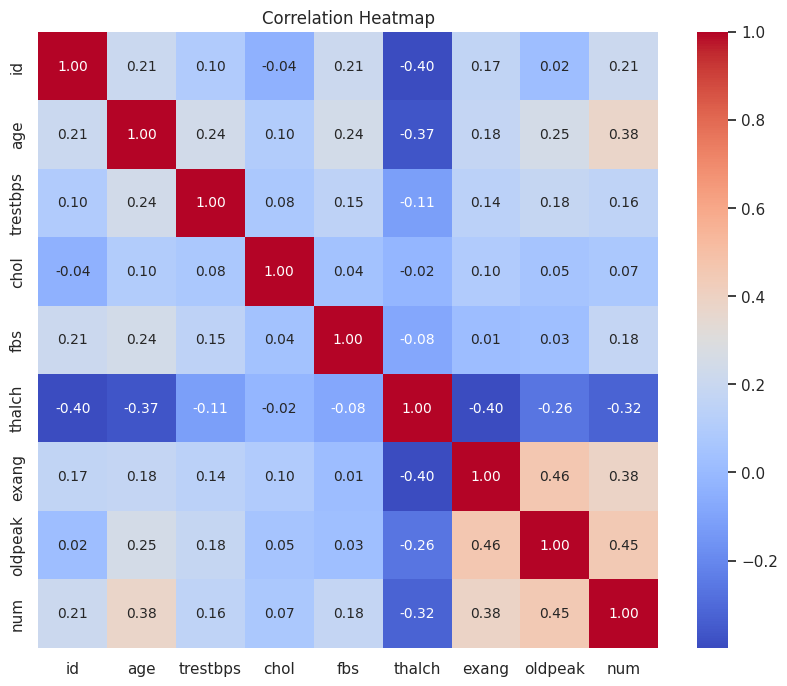

In [ ]:
# Correlation matrix
correlation_matrix = df_Heart_data.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

**Strong Positive Correlations:**

'num' (target variable) has a moderately strong positive correlation with:
'oldpeak': 0.50
'age': 0.37
'exang': 0.39

**Moderate Correlations:**

'oldpeak' shows moderate positive correlations with 'exang' (0.45) and 'age' (0.26).
'exang' has a moderate positive correlation with 'age' (0.19).

**Negative Correlation:**

'thalch' has a moderate negative correlation (-0.30) with the target variable ('num').


<font color="darkblue">#####################################################################################################<font>



# **#OBSERVATIONS**


1.   The dataset predominantly comprises individuals within the age range of 50-60 years, suggesting a higher concentration of patients within this age bracket.
2.  The dataset exhibits a male-majority trend, indicating that most patients in the dataset are male.
3.   Among the types of chest pain, 'Asymptomatic' appears most frequently, while 'Typical Angina' is the least observed.
4. Analyzing age distributions through box plots showcases similar patterns for both genders, indicating comparable age distributions despite the male majority in the dataset.
5.   Specifically exploring chest pain types, it's notable that 'Asymptomatic' is the most observed in males, while in females, the distribution among chest pain types appears more balanced.
6. Examining the scatter plot for 'Cholesterol' versus 'Resting Blood Pressure', it's evident that higher cholesterol values tend to correspond to elevated resting blood pressure values. This suggests a potential positive correlation between these two factors, where higher cholesterol levels often align with higher resting blood pressure readings.










# **#CONCLUSION**



1. **Data Size** : The Dataset has 920 entries thus the size of the datset is valid for a predictive analysis
2. **Class imbalance** : The numer of entries for target variable for each class is acceptable  suggesting no class imbalance
3. **Skew**: There is no extreme skew in the predictors
4. **Correlation**: As observed from the heatmap the target variable has high and moderate correlation with the predictors
5. **Missing values**: The dataset does have missing values that can be easily cleaned

<font color="red">**On considering these factor the UCI Heart Disease Data can user for creating a predictive model that predict the category of heart disease .**<font>




<font color="darkblue">#####################################################################################################<font>
<font color="darkblue">#####################################################################################################<font>



<font color="darkblue">#####################################################################################################<font>
<font color="darkblue">#####################################################################################################<font>

# **#Task at Organization**


I am currently working in a game development company which focus on the kids category. Some possile ML task that i feel can arise in the organization are


1.   Customer conversion from unsbuscried user to subscried user.
2.   Player behaviour patterns- which content is working and which is not.


If provided any of these tasks , i would require data corresponding to users.Due to the factor that the users are kids there is a huge challange in acessing the data.

  The company database and firebase backend connected to specific product to be analyzed will have the data for  tasks.

  Being TeamLead of Game Development team i will approach the TL of Database team to process the request to get user data from specfic time period.

  The Database team will forward the data to the Data Security team to confirm no user specfic data is avaialable, after valuation the data will be further checked by the Management and provided to me and my team.

The sources would primarly be the company's database.
The main challanges would be the approval of the secuirty team


If i need data from Playstore, App store i can approach the marketing team to provide data related to downloads , devices, region etc












<font color="darkblue">#####################################################################################################<font>

